In [1]:
import numpy as np
import cv2
import os

def load_coord_nose(archivo):
    coordenadas = []
    with open(archivo, 'r') as f:
        next(f)
        next(f)
        for linea in f:
            datos = linea.split()
            coordenadas.append([datos[0],int(datos[5]),int(datos[6])])
    return coordenadas

def crop_nose(coordinates, tamaño=(25, 30)):
    nose_cropped = []
    j=0
    directorio_archivos = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            ruta_completa = os.path.join(directorio_archivos, coord[0])
            imagen_cara = cv2.imread(ruta_completa)
            x, y = coord[1], coord[2]
            nariz_recortada = imagen_cara[y - (tamaño[1]//4)*3:y + tamaño[1]//4, x - tamaño[0]//2:x + tamaño[0]//2]
            nose_cropped.append(nariz_recortada)
    return nose_cropped
def load_coordinates_mouth(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0], int(data[7]), int(data[8]), int(data[9]), int(data[10])]) # Extracting nose coordinates
    return coordinates

def load_coord_nose_mouth(file):
    coordinates = []
    with open(file, 'r') as f:
        next(f)
        next(f)
        for line in f:
            data = line.split()
            coordinates.append([data[0], int(data[5]), int(data[6]),int(data[7]), int(data[8]), int(data[9]), int(data[10])])
    return coordinates
def crop_mouth(coordinates, size=(40, 18)):
    cropped_mouths = []
    j=0
    directory_files = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    for coord in coordinates:
        if int(coord[0].split('.')[0])>= 182638:
            full_path = os.path.join(directory_files, coord[0])
            face_image = cv2.imread(full_path)
            lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4] 
            x = (lm_x + rm_x)//2
            y = (lm_y + rm_y)//2
            cropped_mouth = face_image[y - size[1]//4:y + (size[1]//4)*3, x - size[0]//2:x + size[0]//2]
            cropped_mouths.append(cropped_mouth)
    return cropped_mouths


In [2]:
archivo = "list_landmarks_align_celeba.txt"
coord_nose = load_coord_nose(archivo)
croped_nose = crop_nose(coord_nose)
media = np.mean(croped_nose, axis=0)
media_uint8 = media.astype(np.uint8)
coord_mouth = load_coordinates_mouth(archivo)
cropped_mouth = crop_mouth(coord_mouth)
mean = np.mean(cropped_mouth, axis=0)
mean_m = mean.astype(np.uint8)


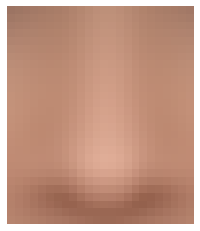

In [3]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(media_uint8, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off')  
plt.show()

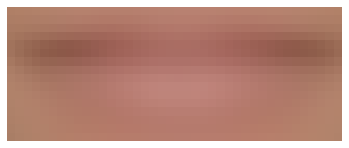

In [4]:
import matplotlib.pyplot as plt
imagen_rgb = cv2.cvtColor(mean_m, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb.astype(np.uint8))
plt.axis('off') 
plt.show()

In [5]:
import csv
def replace_nose_mouth_delta(coordinates, delta, gamma, size_nose=(25, 30), size_mouth=(40, 18)):
    narices_recortadas = []
    j=0
    directorio_archivos = "/home/constanza/tfg/TFG/thesis/img_align_celeba"
    salida_directorio = "/home/constanza/tfg/TFG/thesis/mouth_nose"
    with open('parsed_files/celeba-att-male-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list.append(img_id)
    with open('parsed_files/celeba-att-female-test.csv', 'r') as archivo:
        lineas = csv.reader(archivo)
        img_list_w = []
        next(lineas)
        for linea in lineas:
            img_id =linea[0]
            img_list_w.append(img_id)
    for coord in coordinates:
        img_id = coord[0] 
        if int(img_id.split('.')[0])>= 182638 and img_id in img_list:
            #we load the image
            ruta_completa = os.path.join(directorio_archivos, img_id)
            face_image = cv2.imread(ruta_completa)
            #we obtain the coordinates of the mouth and nose
            x_n, y_n,lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4], coord[5], coord[6]
            x_m = (lm_x + rm_x)//2
            y_m = (lm_y + rm_y)//2
            #we crop the nose and mouth of each image
            naz = face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2]
            cropped_mouth = face_image[y_m - size_mouth[1]//4:y_m + (size_mouth[1]//4)*3, x_m - size_mouth[0]//2:x_m + size_mouth[0]//2]
            mean_color = np.mean(cropped_mouth, axis=(0, 1))  
            adjusted_mouth = mean_m * (300 / 255.0)
            #avarage of nose and mouth
            #comment any of this two lines if you do or do not want to replace mouth or nose on male
            face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2] = media_uint8*delta + naz*(1-delta)
            face_image[y_m - size_mouth[1]//4:y_m + (size_mouth[1]//4)*3, x_m - size_mouth[0]//2:x_m + size_mouth[0]//2] = adjusted_mouth*gamma + cropped_mouth*(1-gamma)
            
            #write the image in the new folder
            imagen_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            ruta_salida = os.path.join(salida_directorio, img_id)
            cv2.imwrite(ruta_salida, face_image)
        elif int(img_id.split('.')[0])>= 182638 and img_id in img_list_w:
            ruta_completa = os.path.join(directorio_archivos, img_id)
            face_image = cv2.imread(ruta_completa)
            #we obtain the coordinates of the mouth and nose
            x_n, y_n,lm_x, lm_y, rm_x, rm_y = coord[1], coord[2],coord[3], coord[4], coord[5], coord[6]
            x_m = (lm_x + rm_x)//2
            y_m = (lm_y + rm_y)//2
            #naz = face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2]
            cropped_mouth = face_image[y_m - size_mouth[1]//4:y_m + (size_mouth[1]//4)*3, x_m - size_mouth[0]//2:x_m + size_mouth[0]//2]
            mean_color = np.mean(cropped_mouth, axis=(0, 1))  
            adjusted_mouth = mean_m * (300 / 255.0)
            
            #comment any of this two lines if you do or do not want to replace mouth or nose on female
            #face_image[y_n - (size_nose[1]//4)*3:y_n + size_nose[1]//4, x_n - size_nose[0]//2:x_n + size_nose[0]//2] = media_uint8*(delta) + naz*(1-delta)
            face_image[y_m - size_mouth[1]//4:y_m + (size_mouth[1]//4)*3, x_m - size_mouth[0]//2:x_m + size_mouth[0]//2] = adjusted_mouth*gamma + cropped_mouth*(1-gamma)
            
            
            imagen_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
            ruta_salida = os.path.join(salida_directorio, img_id)
            cv2.imwrite(ruta_salida, face_image)

In [6]:
all_cord = load_coord_nose_mouth("list_landmarks_align_celeba.txt")
print(all_cord[0])

['000001.jpg', 77, 142, 73, 152, 108, 154]


In [7]:
replace_nose_mouth_delta(all_cord, 1,0.5)

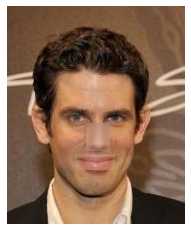

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/constanza/tfg/TFG/thesis/mouth_nose/182780.jpg')
plt.imshow(img)
plt.axis('off')  # Para quitar los ejes
plt.show()